# RANDOM FOREST

### Dieses notebook enthält erste Versuche des Modeltrainings und weißt Fehler auf, bzw. ist nicht vollständig
### Bitte zu folgendem notebook wechseln: [Random Forest_2](random_forest_2.ipynb)


- Werte müssen alle numerisch sein
- nur notwendinge Features im Datensatz behalten
- Zielvariable extrahieren
- Aufteilen in Trainings- und Testdaten
- Model überprüfen 

In [1]:
import pandas as pd
import geopandas as gpd

# GeoJSON-Datei laden
gdf = gpd.read_file('../../../data/processed_data/simra_osm_all.geojson')

# Entfernen der Polygone (Geometrie) und nicht benötigter Spalten
df = gdf.drop(columns=['markers', 'id', 'index_right', 'geometry', 'highway', 'incidents', 'rides'])


# Anzeigen der ersten Zeilen und Spaltennamen, um zu prüfen, wie die Daten aussehen
df.head()




,type,score,maxspeed,asphalt,concrete,paving_stone,sett,unpaved,cycleway,footway,highway_rare,living_street,path,primary,residential,secondary,service,tertiary,track
0,Street,0.0,50,0.000000,1.0,0.0,0.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.000000,0.750000,0.0,0.000000,0.0
1,Junction,0.0,30,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0
2,Junction,0.0,50,0.846154,0.0,0.0,0.0,0.153846,0.384615,0.0,0.0,0.0,0.0,0.0,0.153846,0.461538,0.0,0.000000,0.0
3,Street,0.0,30,0.500000,0.0,0.0,0.0,0.500000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0
4,Street,0.0,50,1.000000,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.666667,0.0


In [30]:
df.columns

Index(['type', 'score', 'maxspeed', 'asphalt', 'concrete', 'paving_stone',
       'sett', 'unpaved', 'cycleway', 'footway', 'highway_rare',
       'living_street', 'path', 'primary', 'residential', 'secondary',
       'service', 'tertiary', 'track'],
      dtype='object')

**type STREET und JUNCTION in numerische Werte (boolsche Werte) umwandeln**


In [31]:
# One-Hot-Encoding für kategorische Spalte 'type'
df = pd.get_dummies(df, columns=['type'])

df.head()


,score,maxspeed,asphalt,concrete,paving_stone,sett,unpaved,cycleway,footway,highway_rare,living_street,path,primary,residential,secondary,service,tertiary,track,type_Junction,type_Street
0,0.0,50,0.000000,1.0,0.0,0.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.000000,0.750000,0.0,0.000000,0.0,False,True
1,0.0,30,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0,True,False
2,0.0,50,0.846154,0.0,0.0,0.0,0.153846,0.384615,0.0,0.0,0.0,0.0,0.0,0.153846,0.461538,0.0,0.000000,0.0,True,False
3,0.0,30,0.500000,0.0,0.0,0.0,0.500000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0,False,True
4,0.0,50,1.000000,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.666667,0.0,False,True


**"score" als Zielvariable definieren**

In [21]:
# Zielvariable (Score) definieren
y = df['score']

In [32]:
# Alle anderen Spalten als Features verwenden ('score')
X = df.drop(columns=['score'])

**Datensatz splitten**

In [43]:
from sklearn.model_selection import train_test_split

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Anzahl der Trainingsdaten: {X_train.shape[0]}")
print(f"Anzahl der Testdaten: {X_test.shape[0]}")


Anzahl der Trainingsdaten: 12529
Anzahl der Testdaten: 3133


**Random Forest Modell trainieren**

In [41]:
from sklearn.ensemble import RandomForestRegressor  # Verwende RandomForestRegressor für Regression

# Random Forest Regressor Modell erstellen
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Modell trainieren
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

# Vorhersagen auf den Testdaten
y_pred = rf.predict(X_test)

# Modellbewertung
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mittlere quadratische Fehler (MSE): {mse:.2f}")
print(f"Bestimmtheitsmaß (R^2): {r2:.2f}")


Mittlere quadratische Fehler (MSE): 0.00
Bestimmtheitsmaß (R^2): -0.12


### --> äußerst ungewöhnliche Werte --> irgendwas läuft nicht richtig

### mögliche Ursachen:
- Probleme beim Aufteilen der Daten
       --> bei uns nicht gegeben, weil die Aufteilung mit Anzahl der Trainingsdaten: 12529 und Anzahl der Testdaten: 3133 der typischen 80/20 Vertteilung entspricht

- Überlappung bei Trainings- und Testdaten

In [44]:
# Überprüfe, ob es keine Überlappungen zwischen Trainings- und Testdaten gibt
print("Kollidieren in X_train und X_test:")
print(set(X_train.index).intersection(set(X_test.index)))

print("Kollidieren in y_train und y_test:")
print(set(y_train.index).intersection(set(y_test.index)))

Kollidieren in X_train und X_test:
set()
Kollidieren in y_train und y_test:
set()


--> es gibt keine Überlappung bei Trainings- und Testdaten

- fehlende Werte, fehlerhafte Daten

In [45]:
# Überprüfe fehlende Werte in den Trainings- und Testdaten
print(X_train.isnull().sum())
print(X_test.isnull().sum())


maxspeed         0
asphalt          0
concrete         0
paving_stone     0
sett             0
unpaved          0
cycleway         0
footway          0
highway_rare     0
living_street    0
path             0
primary          0
residential      0
secondary        0
service          0
tertiary         0
track            0
type_Junction    0
type_Street      0
dtype: int64
maxspeed         0
asphalt          0
concrete         0
paving_stone     0
sett             0
unpaved          0
cycleway         0
footway          0
highway_rare     0
living_street    0
path             0
primary          0
residential      0
secondary        0
service          0
tertiary         0
track            0
type_Junction    0
type_Street      0
dtype: int64


--> es gibt keine fehlenden Daten oder Nullwerte im Datensatz

- Verteilung der Zielvariablen y in Trainings - und Testdaten

In [46]:
print(y_train.describe())
print(y_test.describe())


count    12529.000000
mean         0.010467
std          0.042034
min          0.000000
25%          0.000000
50%          0.000000
75%          0.005682
max          1.230854
Name: score, dtype: float64
count    3133.000000
mean        0.010410
std         0.047140
min         0.000000
25%         0.000000
50%         0.000000
75%         0.005495
max         1.522222
Name: score, dtype: float64


--> Werte sind bei beiden sehr ähnlich - das ist gut  
--> Der Mittelwert der Zielvariable ist sehr niedrig und die Standardabweichung zeigt, dass die Werte im Vergleich zu ihrem Mittelwert wenig variieren.   
--> Das bedeutet, dass die Zielvariable in den meisten Fällen nahe bei 0 liegt und nur wenige hohe Werte aufweist.

- Ein MSE von 0.00 kann darauf hindeuten, dass das Modell möglicherweise nur sehr kleine Fehler gemacht hat, was besonders dann zutrifft, wenn die Zielwerte klein sind und sich nahe bei 0 befinden.
- Ein R² von -0.12 deutet darauf hin, dass das Modell schlechter abschneidet als ein einfaches Mittelwertmodell. Dies könnte daran liegen, dass die Zielvariable sehr wenig Varianz hat, sodass selbst kleine Fehler zu einem scheinbar perfekten Modell führen können, das aber tatsächlich keine nützliche Vorhersage liefert.

-> **Zielvariable normalisieren oder skalieren**:  
Es könnte hilfreich sein, die Zielvariable zu skalieren, wenn ihre Werte in einem sehr kleinen Bereich liegen. Dies kann durch eine Standardisierung oder Normalisierung erreicht werden. Manchmal hilft dies dabei, die Modellbewertung zu verbessern.

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).ravel()


In [48]:
y_train_pred = rf.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Trainings-MSE: {mse_train:.2f}")
print(f"Trainings-R^2: {r2_train:.2f}")


Trainings-MSE: 0.00
Trainings-R^2: 0.49


**Interpretation der Ergebnisse**

Trainings-MSE von 0.00:
- Der mittlere quadratische Fehler (MSE) von 0.00 auf den Trainingsdaten deutet darauf hin, dass das Modell perfekt an die Trainingsdaten angepasst ist, was in der Regel darauf hinweist, dass das Modell möglicherweise überfitten könnte. Das bedeutet, dass das Modell sehr gut auf den Trainingsdaten funktioniert, aber möglicherweise nicht gut auf unbekannte Testdaten generalisiert.

Trainings-R² von 0.49:
- Ein R² von 0.49 auf den Trainingsdaten bedeutet, dass das Modell etwa 49% der Varianz in den Trainingsdaten erklärt. Das ist eine moderate Leistung und deutet darauf hin, dass das Modell eine gewisse erklärende Kraft hat, aber es ist nicht perfekt.

**Überprüfe die Modellbewertung auf Testdaten**

Da das Modell auf den Trainingsdaten perfekt funktioniert, aber das R² auf den Testdaten negativ ist, gibt es einen Hinweis auf Overfitting. Überprüfe die Modellbewertung auf den Testdaten erneut:

In [49]:
# Berechne Vorhersagen auf den Testdaten
y_test_pred = rf.predict(X_test)

# Berechne MSE und R² für Testdaten
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test-MSE: {mse_test:.2f}")
print(f"Test-R^2: {r2_test:.2f}")


Test-MSE: 0.00
Test-R^2: -0.12



  **Cross-Validation**

Cross-Validation hilft dabei, die Generalisierungsfähigkeit des Modells zu überprüfen und Überanpassung zu vermeiden.   
K-Fold Cross-Validation:

In [50]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# Cross-Validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f"Cross-Validation MSE: {cv_mse:.2f}")

# Vorhersagen durch Cross-Validation
cv_predictions = cross_val_predict(rf, X, y, cv=5)
cv_mse = mean_squared_error(y, cv_predictions)
cv_r2 = r2_score(y, cv_predictions)

print(f"Cross-Validation MSE: {cv_mse:.2f}")
print(f"Cross-Validation R^2: {cv_r2:.2f}")


Cross-Validation MSE: 0.00
Cross-Validation MSE: 0.00
Cross-Validation R^2: -0.15


**Hyperparameter Tuning**

In [51]:
# Überprüfe die Hyperparameter des Modells
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Optimierter Test-MSE: {mse_best:.2f}")
print(f"Optimiertes Test-R^2: {r2_best:.2f}")


Optimierter Test-MSE: 0.00
Optimiertes Test-R^2: -0.03


**Interpretation der Ergebnisse**

- Optimierter Test-MSE von 0.00:
        Ein mittlerer quadratischer Fehler (MSE) von 0.00 ist ungewöhnlich und zeigt an, dass das Modell auf den Testdaten perfekt vorhersagt. Das kann auf einen Fehler im Modell, Datenleck oder falsche Berechnung des MSE hinweisen.

- Optimiertes Test-R² von -0.03:
        Ein negatives R² bedeutet, dass das Modell schlechter ist als eine einfache mittlere Vorhersage (Mittelwert der Zielvariable). Ein R² von -0.03 bedeutet, dass das Modell nur wenig von der Varianz in den Testdaten erklärt und sogar schlechter als ein zufälliges Modell sein könnte.

**Daten- und Feature-Analyse**


In [52]:
# Überprüfe Feature-Wichtigkeiten
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feature_importances)


unpaved          0.148304
residential      0.137772
asphalt          0.106945
service          0.105704
paving_stone     0.086653
secondary        0.074037
maxspeed         0.057740
tertiary         0.055963
footway          0.037976
primary          0.036335
cycleway         0.032960
path             0.026451
concrete         0.022193
highway_rare     0.019818
living_street    0.015685
type_Street      0.013401
type_Junction    0.013114
track            0.005449
sett             0.003499
dtype: float64


**Was sagen die Feature-Wichtigkeiten aus?**

Feature-Wichtigkeiten: Die Werte geben an, wie viel jedes Feature zur Vorhersageleistung des Modells beiträgt. Höhere Werte bedeuten, dass das Feature eine größere Rolle in der Modellvorhersage spielt. Ein Feature mit einer Wichtigkeit von 0 hätte keinen Einfluss auf die Modellvorhersage.

Relative Bedeutung der Features:
- unpaved (0.148): Dieses Feature hat die höchste Wichtigkeit von allen und scheint der bedeutendste Prädiktor für die Zielvariable (den Score) zu sein. Dies könnte bedeuten, dass unbefestigte Straßen (unpaved) ein starkes Indiz für das Potenzial eines Unfalls mit dem Fahrrad darstellen.
- residential (0.138) und asphalt (0.107): Auch diese beiden Features haben hohe Wichtigkeitswerte. Straßen in Wohngebieten und das Vorhandensein von Asphalt scheinen ebenfalls wichtige Faktoren bei der Vorhersage des Scores zu sein.
- service (0.106) und paving_stone (0.087): Service-Straßen und Pflastersteine sind ebenfalls relativ wichtig. Sie könnten mit bestimmten Verkehrsmustern oder Straßenzuständen assoziiert sein, die die Unfallwahrscheinlichkeit beeinflussen.

Geringere Bedeutung der Features:
- Features wie sett (0.003) und track (0.005) haben sehr niedrige Wichtigkeiten. Dies bedeutet, dass diese Features kaum zur Vorhersagekraft des Modells beitragen und in deinem Fall möglicherweise weniger relevant sind.
- type_Street (0.013) und type_Junction (0.013): Diese Features haben eine geringe Wichtigkeit, was darauf hindeutet, dass die Art der Straße oder Kreuzung weniger Einfluss auf die Vorhersage der Zielvariable hat.

**Was bedeutet das für das Modell?**

Feature-Wichtungen helfen, das Modell zu interpretieren: Sie zeigen, welche Eingabevariablen (Features) das Modell als die wichtigsten identifiziert hat. Dies kann helfen zu verstehen, welche Faktoren am stärksten zur Vorhersage beitragen.

Mögliche Feature-Reduktion: Da einige Features sehr niedrige Wichtigkeitswerte haben, wäre zu überlegen, diese aus dem Modell zu entfernen, um es zu vereinfachen und möglicherweise zu verbessern, besonders wenn sie das Modell nur unnötig komplex machen.

Domain-Spezifische Erkenntnisse: Die Ergebnisse der Feature-Wichtigkeiten können auch domänenspezifische Einblicke geben. Beispielsweise könnte die hohe Wichtigkeit von "unpaved" darauf hinweisen, dass das Fahren auf unbefestigten Straßen ein erheblicher Risikofaktor für Fahrradunfälle ist.

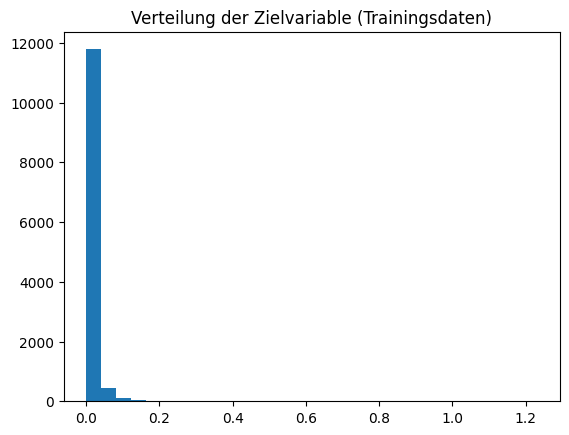

In [53]:
import matplotlib.pyplot as plt
plt.hist(y_train, bins=30)
plt.title("Verteilung der Zielvariable (Trainingsdaten)")
plt.show()


In [54]:
print("Beste Hyperparameter:", grid_search.best_params_)
print("Bestes Score:", grid_search.best_score_)


Beste Hyperparameter: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Bestes Score: -0.0018013234146487395


**WEITERE TODOS:**

- Hyperparameter Tuning noch ausführlicher genauer...
- 

- alternative Modelle:

    Probiere alternative Modelle oder andere Regressionsalgorithmen aus, um zu sehen, ob die Leistung des Modells verbessert werden kann. Manchmal sind einfache Modelle wie LinearRegression oder komplexere Modelle wie GradientBoostingRegressor hilfreicher.